# Projek Akhir Praktikum Kecerdasan Buatan <br> Klasifikasi Kucing dan Kelinci
 Kelompok 8 (A1-21) :<br> 
 Al Fiana Nur Priyanti (2109106022) <br>
 Shafira Octafia (2109106023)

## Import Library

In [2]:
import os
import numpy as np
import pandas as pd
import splitfolders
import seaborn as sns 
import tensorflow as tf
from tensorflow import keras
from keras import layers, Sequential
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

## Data Collecting

In [3]:
base_dir = 'files/'
os.listdir(base_dir)

['Cat', 'Rabbit']

## Data Preprocessing

### Split Data

In [4]:
# splitfolders.ratio(base_dir, 
#                    output="Cat vs Rabbit", 
#                    seed=1337, 
#                    ratio=(0.7, 0.1, 0.2)
#                   )

In [5]:
train_dir = 'Cat vs Rabbit/train/'
val_dir = 'Cat vs Rabbit/val/'
test_dir = 'Cat vs Rabbit/test/'

### Data Train

In [6]:
dataset_train = image_dataset_from_directory(
    'Cat vs Rabbit/train',
    labels = 'inferred',
    label_mode = 'int',
    class_names = ['Cat', 'Rabbit'],
    image_size = (80, 80),
    shuffle = True,
    seed = 47,
)


Found 1419 files belonging to 2 classes.


### Data Validation

In [7]:
dataset_val = image_dataset_from_directory(
    'Cat vs Rabbit/val',
    labels = 'inferred',
    label_mode = 'int',
    class_names = ['Cat', 'Rabbit'],
    image_size = (80, 80),
    shuffle = True,
    seed = 47,
)


Found 202 files belonging to 2 classes.


### Data Test

In [8]:
dataset_test = image_dataset_from_directory(
    'Cat vs Rabbit/test',
    labels = 'inferred',
    label_mode = 'int',
    class_names = ['Cat', 'Rabbit'],
    image_size = (80, 80),
    shuffle = True,
    seed = 47,
)

Found 408 files belonging to 2 classes.


### Augmentasi Data

In [9]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    brightness_range = [0.5, 1.0],
    rotation_range = 30,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

val_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)


In [11]:
train_generator = train_datagen.flow_from_directory(
    train_dir, # direktori data train
    target_size = (80,80), # mengubah resolusi seluruh gambar jadi 80*80
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size = (80,80),
    class_mode = 'binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (80,80),
    class_mode = 'binary'
)



Found 1419 images belonging to 2 classes.
Found 202 images belonging to 2 classes.
Found 408 images belonging to 2 classes.


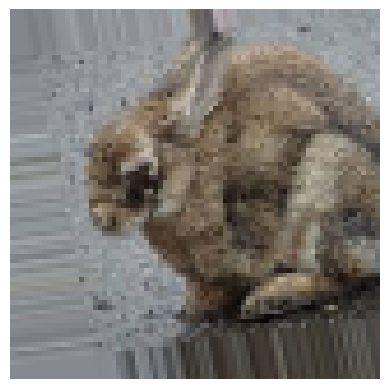

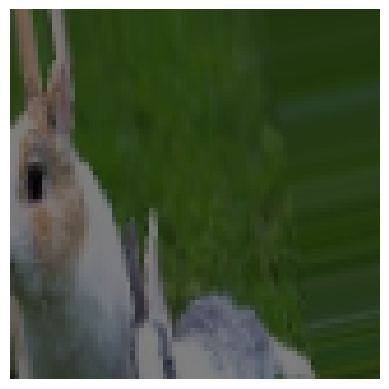

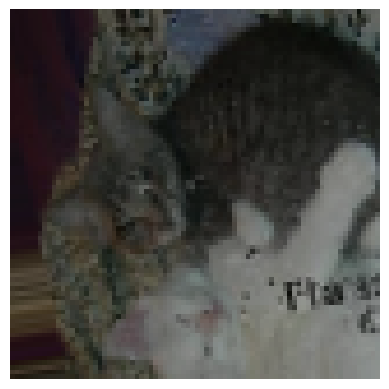

In [28]:
for _ in range(3):
    img, label = train_generator.next()
    plt.imshow(img[0])
    plt.axis('off')
    plt.show()

## Data Analisis dan Visualisasi

In [14]:
image, label = next(iter(dataset_train))
class_names = dataset_train.class_names

# Shape Gambar
print(" Image Shape = ", image.shape)

# Shape Label
print(" Label Shape = ", label.shape)

# Kelas dalam dataset
print(" Class       = ", class_names)

 Image Shape =  (32, 80, 80, 3)
 Label Shape =  (32,)
 Class       =  ['Cat', 'Rabbit']


### Preview Image

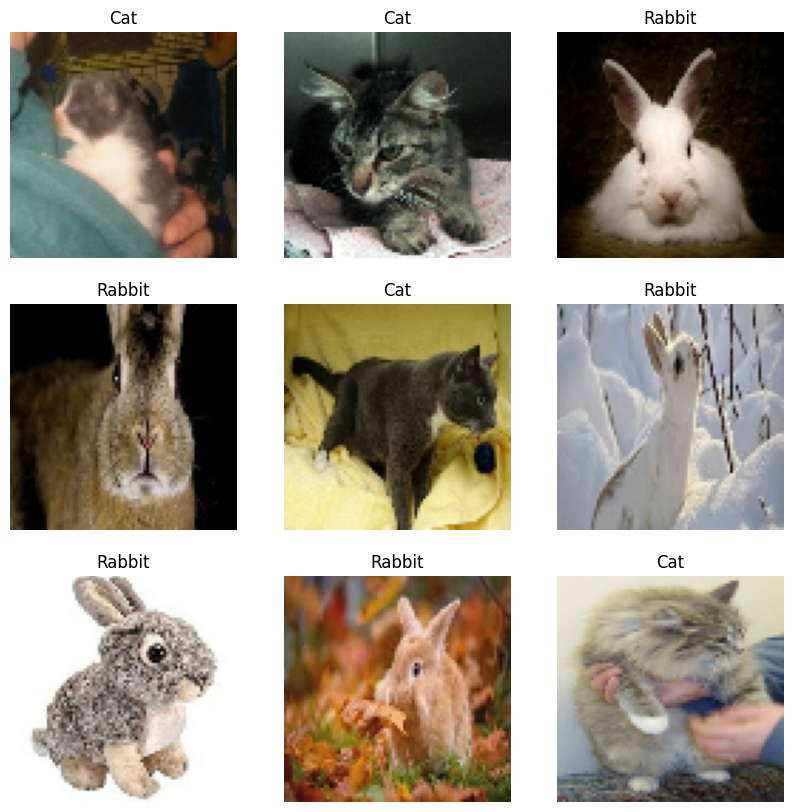

In [15]:
plt.figure(figsize=(10,10))

for images, labels in dataset_train.take(1):
    for i in range(9):
        ax = plt.subplot(3,3, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis('off')
    img = images[0]

### Visualisasi Jumlah Data Training Setiap Kelas

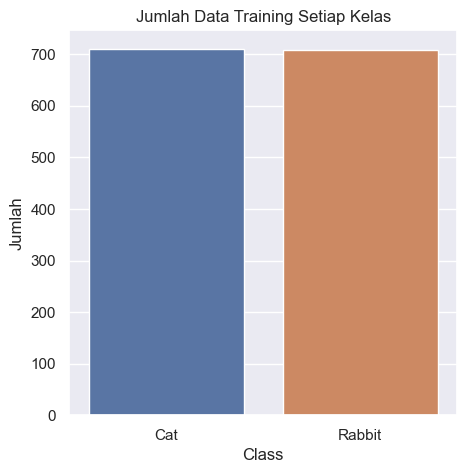

In [16]:
train_temp = dataset_train.unbatch()
train_labels = []
for x, y in train_temp:
    index = y
    train_labels.append(class_names[index])

plt.figure(figsize=(5, 5))
sns.set_theme()
sns.countplot(x=train_labels)
plt.xlabel('Class')
plt.ylabel('Jumlah')
plt.title('Jumlah Data Training Setiap Kelas')
plt.show()

### Visualisasi Jumlah Data Validation Setiap Kelas

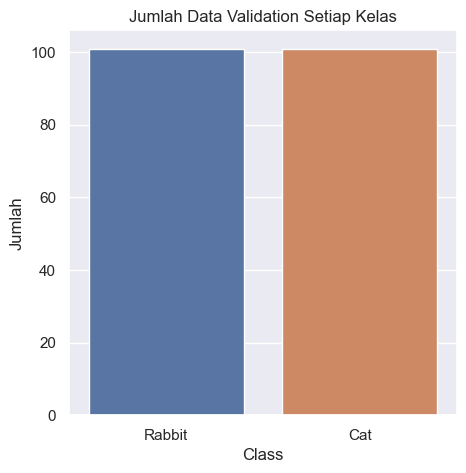

In [17]:
val_temp = dataset_val.unbatch()
val_labels = []
for x, y in val_temp:
    index = y
    val_labels.append(class_names[index])
    
plt.figure(figsize=(5, 5))
sns.set_theme()
sns.countplot(x=val_labels)
plt.xlabel('Class')
plt.ylabel('Jumlah')
plt.title('Jumlah Data Validation Setiap Kelas')
plt.show()

### Visualisasi Jumlah Data Testing Setiap Kelas

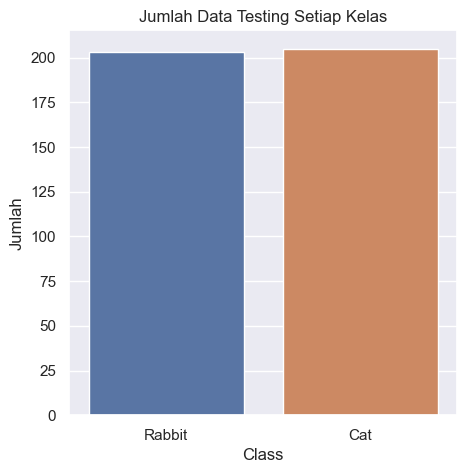

In [18]:
test_temp = dataset_test.unbatch()
test_labels = []
for x, y in test_temp:
    index = y
    test_labels.append(class_names[index])
    
plt.figure(figsize=(5, 5))
sns.set_theme()
sns.countplot(x=test_labels)
plt.xlabel('Class')
plt.ylabel('Jumlah')
plt.title('Jumlah Data Testing Setiap Kelas')
plt.show()

## Modeling

In [19]:
model = keras.Sequential(
    [
        #input layer
        Conv2D(32, (3,3), activation='relu', input_shape = [80, 80, 3]),
        
        #hidden layer
        MaxPooling2D(2, 2),
        Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D(2, 2),
        Conv2D(128, (3,3), activation='relu'),
        MaxPooling2D(2, 2),
        Conv2D(128, (3,3), activation='relu'),
        MaxPooling2D(2, 2),
        Dropout(0.5),
        Flatten(),
        Dense(128, activation='relu'),
        
        #output layer
        Dense(1, activation='sigmoid')
    ]
)

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 78, 78, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 39, 39, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 37, 37, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 18, 18, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 8, 128)        0

In [21]:
# CALLBACK
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.95 and logs.get('val_accuracy') > 0.95):
      print("\nAkurasi telah mencapai > 95%!")
      self.model.stop_training = True
cb = myCallback()

In [22]:
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ["accuracy"]
)

In [23]:
# Fit Model
hasil = model.fit(
    train_generator, 
    epochs = 30, 
    batch_size = 64,
    validation_data = val_generator,
    callbacks = cb
    )

Epoch 1/30
45/45 [==============================] - 24s 483ms/step - loss: 0.6937 - accuracy: 0.5137 - val_loss: 0.6927 - val_accuracy: 0.5000
Epoch 2/30
45/45 [==============================] - 23s 510ms/step - loss: 0.6514 - accuracy: 0.6004 - val_loss: 0.5827 - val_accuracy: 0.6188
Epoch 3/30
45/45 [==============================] - 21s 459ms/step - loss: 0.5860 - accuracy: 0.6899 - val_loss: 0.5167 - val_accuracy: 0.6931
Epoch 4/30
45/45 [==============================] - 24s 524ms/step - loss: 0.5297 - accuracy: 0.7209 - val_loss: 0.4904 - val_accuracy: 0.7475
Epoch 5/30
45/45 [==============================] - 25s 572ms/step - loss: 0.4891 - accuracy: 0.7625 - val_loss: 0.4811 - val_accuracy: 0.7475
Epoch 6/30
45/45 [==============================] - 24s 522ms/step - loss: 0.4900 - accuracy: 0.7653 - val_loss: 0.4443 - val_accuracy: 0.7921
Epoch 7/30
45/45 [==============================] - 24s 530ms/step - loss: 0.4754 - accuracy: 0.7745 - val_loss: 0.4122 - val_accuracy: 0.7921

## Evaluasi

In [24]:
# Evaluasi loss dan akurasi
model.evaluate(test_generator, verbose=1)

13/13 [==============================] - 2s 153ms/step - loss: 0.3062 - accuracy: 0.8701


[0.3062135875225067, 0.8700980544090271]

### Visualisasi Akurasi Training dan Validation

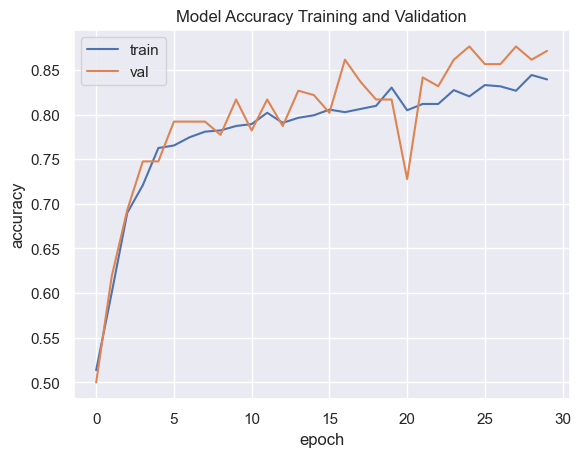

In [25]:
plt.plot(hasil.history['accuracy'])
plt.plot(hasil.history['val_accuracy'])
plt.title('Model Accuracy Training and Validation')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### Visualisasi Loss Training dan Validation

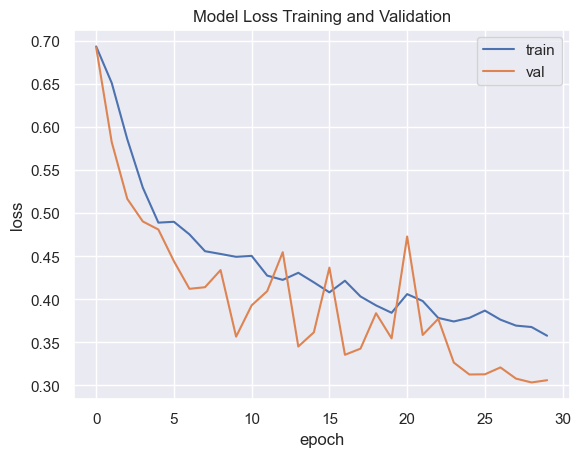

In [26]:
plt.plot(hasil.history['loss'])
plt.plot(hasil.history['val_loss'])
plt.title('Model Loss Training and Validation')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

## Prediksi

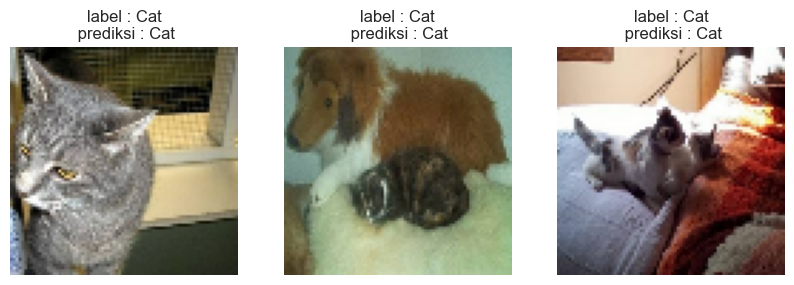

In [55]:
image, label = next(iter(dataset_test))

plt.figure(figsize=(10,10))
for i in range(3):
    plt.subplot(1,3, i+1)
    y_pred = np.argmax(model.predict(image[i][None, ...], verbose=0))
    plt.imshow(tf.squeeze(image[i].numpy().astype("uint8")), cmap = 'Blues_r')
    plt.title(f'label : {class_names[label[i]]}\n prediksi : {class_names[y_pred]}')
    plt.axis('off')

## Save

In [56]:
model.save('model.h5')